In [1]:
import os
import glob
import pickle
import numpy as np
from mne import viz
from scipy import io
from matplotlib import colors, pyplot as plt

In [2]:
CAF_DOSE = 200
SIGNIFICANT_P = 0.05

MODEL_NAMES = ['CONV_0', 'CONV_1', 'CONV_2', 'CONV_3', 'CONV_4', 'CONV_5', 'AVERAGE']

PROJECT_PATH = '..\\data'
DATA_PATH = '..\\results\\raw'

In [3]:
sensor_pos = io.loadmat(os.path.join(PROJECT_PATH, 'Coo_caf'))['Cor'].T
sensor_pos = np.array([sensor_pos[1], sensor_pos[0]]).T

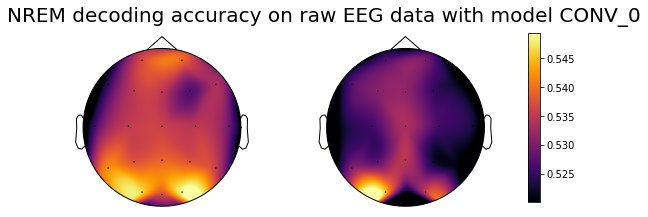

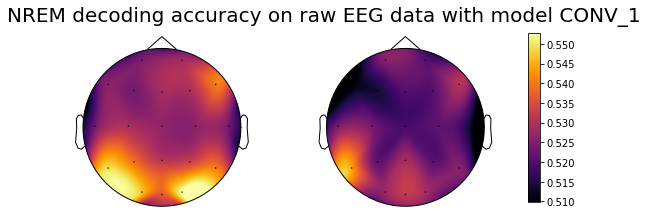

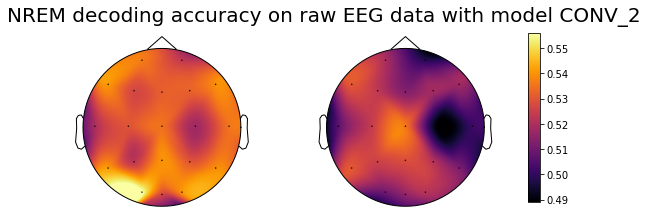

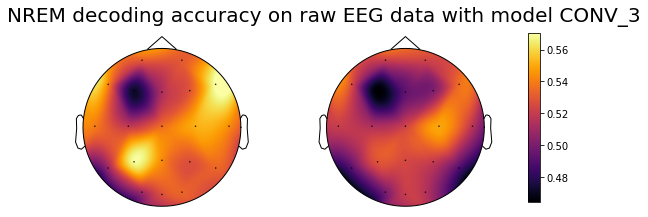

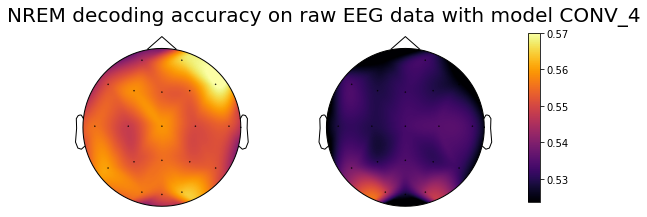

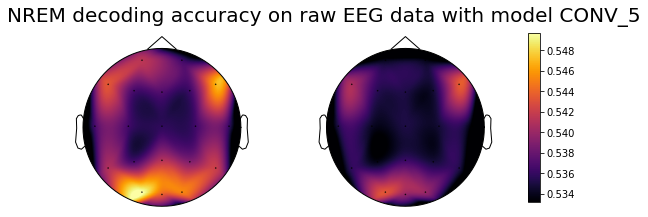

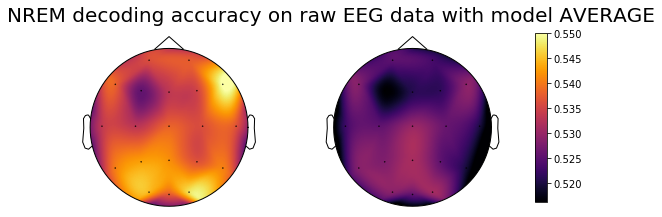

In [4]:
avg_train = np.zeros(20)
avg_test = np.zeros(20)

for model in MODEL_NAMES:
    if model == 'AVERAGE':
        train_acc = avg_train
        test_acc = avg_test
    else:
        train_acc = np.empty(20)
        test_acc = np.empty(20)

        for file in glob.glob(os.path.join(DATA_PATH, model, '*\\results*')):
            electrode = int(file.split(os.sep)[-1].split('.')[0].split('_el')[-1])
            with open(file, 'rb') as curr:
                acc = pickle.load(curr)
            train_acc[electrode] = np.mean(acc['train'])
            test_acc[electrode] = np.mean(acc['test'])

        avg_train += train_acc / (len(MODEL_NAMES) - 1)
        avg_test += test_acc / (len(MODEL_NAMES) - 1)
    
    colormap = 'inferno'

    vmin_train = np.min(train_acc)
    vmax_train = np.max(train_acc)

    vmin_test = np.min(test_acc)
    vmax_test = np.max(test_acc)

    vmin_train = vmin_test = min(vmin_train, vmin_test)
    vmax_train = vmax_test = max(vmax_train, vmax_test)
    
    plt.figure(figsize=(10, 3))
    plt.suptitle(f'NREM decoding accuracy on raw EEG data with model {model}', fontsize=20, y=1.05)

    ax_train = plt.subplot(1, 2, 1)
    viz.plot_topomap(train_acc, sensor_pos, cmap=colormap, vmin=vmin_train, vmax=vmax_train, contours=False, show=False)

    ax_test = plt.subplot(1, 2, 2)
    viz.plot_topomap(test_acc, sensor_pos, cmap=colormap, vmin=vmin_test, vmax=vmax_test, contours=False, show=False)

    '''
    norm = colors.Normalize(vmin=vmin_train,vmax=vmax_train)
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=[ax_train], shrink=0.95, aspect=15)
    '''

    norm = colors.Normalize(vmin=vmin_test,vmax=vmax_test)
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=[ax_train, ax_test], shrink=0.95, aspect=15)
    plt.show()